# Decision Trees: Classification

## Understanding Decision Trees 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text

In [2]:
df_umbrella = pd.DataFrame(
    {
        'Chance of Rainy': [.1, .9, .3, .1,],
        'UV Index': [11, 1, 3, 2,],
        'Umbrella': [True, True, False, False, ],
    }
)

In [3]:
print(df_umbrella.to_string(index=False))

 Chance of Rainy  UV Index  Umbrella
             0.1        11      True
             0.9         1      True
             0.3         3     False
             0.1         2     False


In [4]:
feature_names = ['Chance of Rainy', 'UV Index']
target = 'Umbrella'

In [5]:
clf = DecisionTreeClassifier(
    # criterion='entropy'
).fit(
    df_umbrella[feature_names], df_umbrella[target]
)

## Displaying the Decision Tree 

/Users/tarek/anaconda3/envs/scikitbook/lib/python3.6/site-packages/ipykernel_launcher.py:13: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  del sys.path[0]


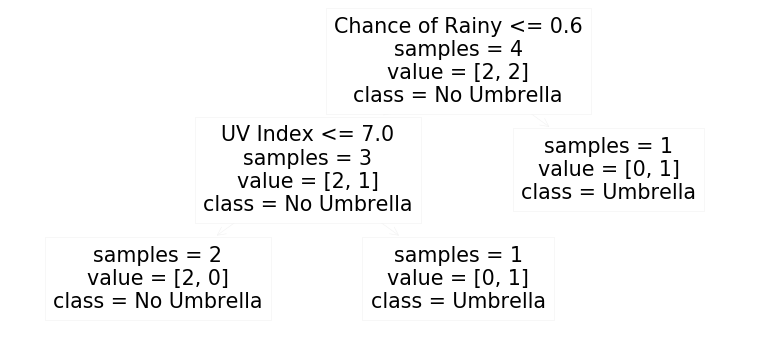

In [6]:
fig, ax = plt.subplots(figsize=(12, 6));

plot_tree(
    clf, 
    filled=False, 
    feature_names=feature_names, 
    class_names=['No Umbrella', 'Umbrella'],
    impurity=False,
    rotate=True,
    ax=ax,
)

fig.show()

In [7]:
print('Shall I take an umbrella with me?\n')
print(
    export_text(clf, feature_names=feature_names, spacing=3, decimals=1)
)

Shall I take an umbrella with me?

|--- Chance of Rainy <= 0.6
|   |--- UV Index <= 7.0
|   |   |--- class: False
|   |--- UV Index >  7.0
|   |   |--- class: True
|--- Chance of Rainy >  0.6
|   |--- class: True



### Tree to if-else

In [8]:
[feature_names[f] for f in clf.tree_.feature if f != -2]

['Chance of Rainy', 'UV Index']

In [9]:
[t for t in clf.tree_.threshold if t != -2]

[0.5999999940395355, 7.0]

In [10]:
clf.tree_.children_left

array([ 1,  2, -1, -1, -1])

In [11]:
# https://stackoverflow.com/questions/20224526/how-to-extract-the-decision-rules-from-scikit-learn-decision-tree
def get_code(tree, feature_names):
        left      = tree.tree_.children_left
        right     = tree.tree_.children_right
        threshold = tree.tree_.threshold
        features  = [feature_names[i] for i in tree.tree_.feature]
        value = tree.tree_.value

        def recurse(left, right, threshold, features, node):
                if (threshold[node] != -2):
                        print( "if ( " + features[node] + " <= " + str(threshold[node]) + " ) {" )
                        if left[node] != -1:
                                recurse (left, right, threshold, features,left[node])
                        print ("} else {")
                        if right[node] != -1:
                                recurse (left, right, threshold, features,right[node])
                        print( "}")
                else:
                        print ("return " + str(value[node][0][1]))

        recurse(left, right, threshold, features, 0)

In [12]:
get_code(clf, feature_names)

if ( Chance of Rainy <= 0.5999999940395355 ) {
if ( UV Index <= 7.0 ) {
return 0.0
} else {
return 1.0
}
} else {
return 1.0
}


# Iris Classification using Decision Trees

In [13]:
import pandas as pd
from sklearn import datasets

## Loading Dataset

In [14]:
iris = datasets.load_iris()

In [15]:
# Let's see what methods the dataset provideds
dir(iris)

['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']

In [16]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [17]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [18]:
list(iris.target_names)

['setosa', 'versicolor', 'virginica']

In [19]:
iris.data[:8]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2]])

In [20]:
iris.target[:8]

array([0, 0, 0, 0, 0, 0, 0, 0])

In [21]:
# It's customary to call a data frame, df
df = pd.DataFrame(
    iris.data,
    columns=iris.feature_names
)

df['target'] = pd.Series(
    iris.target
)

In [22]:
df['target_names'] = df['target'].apply(lambda y: iris.target_names[y])

In [23]:
df.sample(n=6)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_names
71,6.1,2.8,4.0,1.3,1,versicolor
141,6.9,3.1,5.1,2.3,2,virginica
103,6.3,2.9,5.6,1.8,2,virginica
121,5.6,2.8,4.9,2.0,2,virginica
88,5.6,3.0,4.1,1.3,1,versicolor
104,6.5,3.0,5.8,2.2,2,virginica


In [24]:
df.sample(n=6, random_state=42) 

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_names
73,6.1,2.8,4.7,1.2,1,versicolor
18,5.7,3.8,1.7,0.3,0,setosa
118,7.7,2.6,6.9,2.3,2,virginica
78,6.0,2.9,4.5,1.5,1,versicolor
76,6.8,2.8,4.8,1.4,1,versicolor
31,5.4,3.4,1.5,0.4,0,setosa


In [25]:
df.sample(n=6, random_state=42) 

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_names
73,6.1,2.8,4.7,1.2,1,versicolor
18,5.7,3.8,1.7,0.3,0,setosa
118,7.7,2.6,6.9,2.3,2,virginica
78,6.0,2.9,4.5,1.5,1,versicolor
76,6.8,2.8,4.8,1.4,1,versicolor
31,5.4,3.4,1.5,0.4,0,setosa


## Plot our classes

/Users/tarek/anaconda3/envs/scikitbook/lib/python3.6/site-packages/ipykernel_launcher.py:55: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


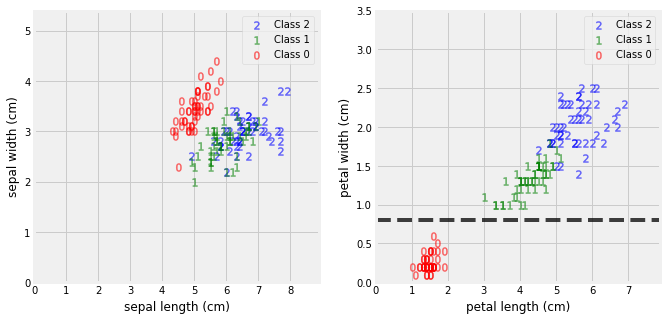

In [26]:
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

fig, axs = plt.subplots(1, 2, figsize=(10, 5));

h_label = 'sepal length (cm)'
v_label = 'sepal width (cm)'

for c in df['target'].value_counts().index.tolist():
    df[
        df['target'] == c
    ].plot(
        kind='scatter',
        x=h_label,
        y=v_label,
        color=['r', 'g', 'b'][c],
        # marker=['1', '2', '3'][c],
        marker=f'${c}$',
        s=64,
        alpha='0.5',
        label=f'Class {c}',
        ax=axs[0],
    )
    
axs[0].set_xlim(0, df[h_label].max() + 1)
axs[0].set_ylim(0, df[v_label].max() + 1)

h_label = 'petal length (cm)'
v_label = 'petal width (cm)'

for c in df['target'].value_counts().index.tolist():
    df[
        df['target'] == c
    ].plot(
        kind='scatter',
        x=h_label,
        y=v_label,
        color=['r', 'g', 'b'][c],
        # marker=['1', '2', '3'][c],
        marker=f'${c}$',
        s=64,
        alpha='0.5',
        label=f'Class {c}',
        ax=axs[1],
    )
    
axs[1].set_xlim(0, df[h_label].max() + 1)
axs[1].set_ylim(0, df[v_label].max() + 1)

axs[1].axhline(y=0.8, color='black', linestyle='--', alpha=0.75)

axs[0].legend()
axs[1].legend()
    
fig.show()

In [27]:
df['petal length x width (cm)'] = df['petal length (cm)'] * df['petal width (cm)']
df['sepal length x width (cm)'] = df['sepal length (cm)'] * df['sepal width (cm)']

df['petal length x sepal length (cm)'] = df['petal length (cm)'] * df['sepal length (cm)']
df['petal width x sepal width (cm)'] = df['petal width (cm)'] * df['sepal width (cm)']

/Users/tarek/anaconda3/envs/scikitbook/lib/python3.6/site-packages/ipykernel_launcher.py:25: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


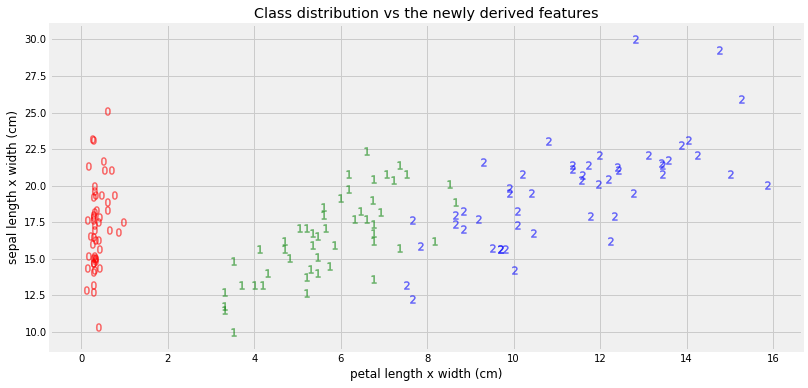

In [28]:
fig, ax = plt.subplots(1, 1, figsize=(12, 6));

h_label = 'petal length x width (cm)'
v_label = 'sepal length x width (cm)'

for c in df['target'].value_counts().index.tolist():
    df[
        df['target'] == c
    ].plot(
        title='Class distribution vs the newly derived features',
        kind='scatter',
        x=h_label,
        y=v_label,
        color=['r', 'g', 'b'][c],
        # marker=['1', '2', '3'][c],
        marker=f'${c}$',
        s=64,
        alpha='0.5',
        ax=ax,
    )
    
# ax.set_xlim(0, df[h_label].max() + 1)
# ax.set_ylim(0, df[v_label].max() + 1)
    
fig.show()

## Split Data

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
df_train, df_test = train_test_split(df, test_size=0.3, random_state=13)

In [31]:
print(df.shape[0], df_train.shape[0], df_test.shape[0])

150 105 45


In [32]:
df_train.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target', 'target_names',
       'petal length x width (cm)', 'sepal length x width (cm)',
       'petal length x sepal length (cm)', 'petal width x sepal width (cm)'],
      dtype='object')

In [33]:
df_train['target']

109    2
39     0
93     1
42     0
54     1
      ..
126    2
98     1
16     0
74     1
82     1
Name: target, Length: 105, dtype: int64

## Train Classifier

In [34]:
from sklearn.tree import DecisionTreeClassifier

In [35]:
clf = DecisionTreeClassifier()

In [36]:
x_train = df_train[iris.feature_names]
x_test  = df_test[iris.feature_names]

y_train = df_train['target']
y_test  = df_test['target']

In [37]:
clf.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [38]:
y_test_pred = clf.predict(x_test)

In [39]:
from sklearn.metrics import accuracy_score

In [40]:
accuracy_score(y_test, y_test_pred)

0.9777777777777777

In [41]:
y_test.value_counts()

2    19
0    14
1    12
Name: target, dtype: int64

In [42]:
# Class 0: 12, class 1: 8, class 2: 18
13 + 16 + 16

45

In [43]:
df_train.shape[0] / (df_train.shape[0] + df_test.shape[0])

0.7

In [44]:
y_train_pred = clf.predict(x_train)
accuracy_score(y_train, y_train_pred)

1.0

In [45]:

pd.DataFrame(
    {
        'feature_names': iris.feature_names,
        'feature_importances': clf.feature_importances_
    }
).sort_values(
    'feature_importances', ascending=False
).set_index(
    'feature_names'
)

,feature_importances
feature_names,
petal length (cm),0.576892
petal width (cm),0.394436
sepal width (cm),0.028673
sepal length (cm),0.000000


In [46]:
[
    (feature, coeff) 
    for feature, coeff in zip(
        iris.feature_names,
        clf.feature_importances_
    )
]

[('sepal length (cm)', 0.0),
 ('sepal width (cm)', 0.028672856362643374),
 ('petal length (cm)', 0.5768915913774021),
 ('petal width (cm)', 0.3944355522599546)]

In [47]:
print('Which species is it?\n')
print(
    export_text(clf, feature_names=iris.feature_names, spacing=3, decimals=1)
)

Which species is it?

|--- petal length (cm) <= 2.4
|   |--- class: 0
|--- petal length (cm) >  2.4
|   |--- petal width (cm) <= 1.8
|   |   |--- petal length (cm) <= 5.5
|   |   |   |--- petal width (cm) <= 1.7
|   |   |   |   |--- petal length (cm) <= 5.0
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- petal length (cm) >  5.0
|   |   |   |   |   |--- petal length (cm) <= 5.0
|   |   |   |   |   |   |--- class: 2
|   |   |   |   |   |--- petal length (cm) >  5.0
|   |   |   |   |   |   |--- class: 1
|   |   |   |--- petal width (cm) >  1.7
|   |   |   |   |--- sepal width (cm) <= 2.8
|   |   |   |   |   |--- class: 2
|   |   |   |   |--- sepal width (cm) >  2.8
|   |   |   |   |   |--- class: 1
|   |   |--- petal length (cm) >  5.5
|   |   |   |--- class: 2
|   |--- petal width (cm) >  1.8
|   |   |--- petal length (cm) <= 4.9
|   |   |   |--- sepal width (cm) <= 3.0
|   |   |   |   |--- class: 2
|   |   |   |--- sepal width (cm) >  3.0
|   |   |   |   |--- class: 1
|   |   |-

In [48]:
clf.get_depth()

6

## Using derived features too

In [49]:
features_orig = iris.feature_names
# features_new = iris.feature_names + ['petal length x width (cm)', 'sepal length x width (cm)']
features_new = ['petal length x width (cm)', 'sepal length x width (cm)']

accuracy_scores_orig = []
accuracy_scores_new = []

for _ in range(500):
    
    df_train, df_test = train_test_split(df, test_size=0.3)
    
    x_train_orig = df_train[features_orig]
    x_test_orig  = df_test[features_orig]
    
    x_train_new = df_train[features_new]
    x_test_new  = df_test[features_new]

    y_train = df_train['target']
    y_test  = df_test['target']
    
    clf_orig = DecisionTreeClassifier(max_depth=2)
    clf_new = DecisionTreeClassifier(max_depth=2)

    clf_orig.fit(x_train_orig, y_train)
    clf_new.fit(x_train_new, y_train)
    
    y_pred_orig = clf_orig.predict(x_test_orig)
    y_pred_new = clf_new.predict(x_test_new)
    
    accuracy_scores_orig.append(round(accuracy_score(y_test, y_pred_orig), 3))
    accuracy_scores_new.append(round(accuracy_score(y_test, y_pred_new), 3))

accuracy_scores_orig = pd.Series(accuracy_scores_orig)
accuracy_scores_new = pd.Series(accuracy_scores_new)

In [50]:
print(
    'Accuracy Orig: {:.2} vs New: {:.2}'.format(
        accuracy_scores_orig.median(),
        accuracy_scores_new.median(),
    )
)

Accuracy Orig: 0.93 vs New: 0.96


/Users/tarek/anaconda3/envs/scikitbook/lib/python3.6/site-packages/ipykernel_launcher.py:19: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


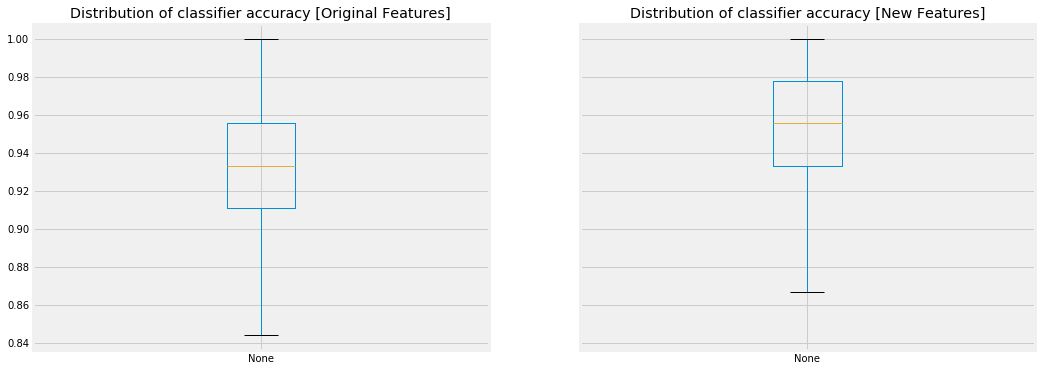

In [51]:
fig, axs = plt.subplots(1, 2, figsize=(16, 6), sharey=True);

accuracy_scores_orig.plot(
    title='Distribution of classifier accuracy [Original Features]',
    kind='box',
    meanline=True,
    grid=True,
    ax=axs[0]
)

accuracy_scores_new.plot(
    title='Distribution of classifier accuracy [New Features]',
    kind='box',
    meanline=True,
    grid=True,
    ax=axs[1]
)

fig.show()

In [52]:
pd.DataFrame(
    {
        'feature_names': features_orig,
        'feature_importances': clf_orig.feature_importances_
    }
).sort_values(
    'feature_importances', ascending=False
).set_index(
    'feature_names'
)

,feature_importances
feature_names,
petal width (cm),1.0
sepal length (cm),0.0
sepal width (cm),0.0
petal length (cm),0.0


In [53]:
pd.DataFrame(
    {
        'feature_names': features_new,
        'feature_importances': clf_new.feature_importances_
    }
).sort_values(
    'feature_importances', ascending=False
).set_index(
    'feature_names'
)

,feature_importances
feature_names,
petal length x width (cm),1.0
sepal length x width (cm),0.0


In [54]:
print('Which species is it? [Original]\n')
print(
    export_text(clf_orig, feature_names=features_orig, spacing=3, decimals=1)
)

print('Which species is it? [New]\n')
print(
    export_text(clf_new, feature_names=features_new, spacing=3, decimals=1)
)

Which species is it? [Original]

|--- petal width (cm) <= 0.7
|   |--- class: 0
|--- petal width (cm) >  0.7
|   |--- petal width (cm) <= 1.7
|   |   |--- class: 1
|   |--- petal width (cm) >  1.7
|   |   |--- class: 2

Which species is it? [New]

|--- petal length x width (cm) <= 2.0
|   |--- class: 0
|--- petal length x width (cm) >  2.0
|   |--- petal length x width (cm) <= 7.4
|   |   |--- class: 1
|   |--- petal length x width (cm) >  7.4
|   |   |--- class: 2



## Small data, accuracy varies

In [55]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

accuracy_scores = []

for _ in range(100):
    
    df_train, df_test = train_test_split(df, test_size=0.3)
    
    x_train = df_train[iris.feature_names]
    x_test  = df_test[iris.feature_names]

    y_train = df_train['target']
    y_test  = df_test['target']
    
    clf = DecisionTreeClassifier(random_state=42)

    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    
    accuracy_scores.append(round(accuracy_score(y_test, y_pred), 3))

accuracy_scores = pd.Series(accuracy_scores)

In [56]:
accuracy_scores.describe(percentiles=[0.05, 0.95])

count    100.000000
mean       0.942630
std        0.031571
min        0.844000
5%         0.889000
50%        0.956000
95%        0.978000
max        1.000000
dtype: float64

Average Score: 0.943 [5th percentile: 0.889 & 95th percentile: 0.978]


/Users/tarek/anaconda3/envs/scikitbook/lib/python3.6/site-packages/ipykernel_launcher.py:9: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  if __name__ == '__main__':


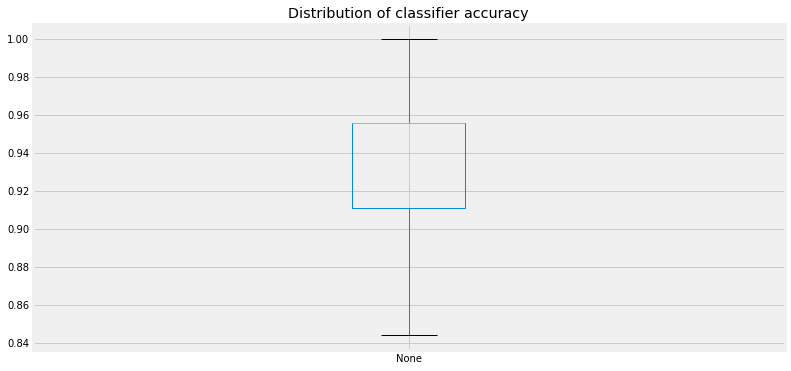

In [57]:
fig, ax = plt.subplots(1, 1, figsize=(12, 6));

accuracy_scores.plot(
    title='Distribution of classifier accuracy',
    kind='box',
    ax=ax
)

fig.show()

print(
    'Average Score: {:.3} [5th percentile: {:.3} & 95th percentile: {:.3}]'.format(
        accuracy_scores.mean(),
        accuracy_scores.quantile(.05),
        accuracy_scores.quantile(.95),
    )
)



## Shuffle Split

In [58]:
import pandas as pd

from sklearn.model_selection import ShuffleSplit
from sklearn.tree import DecisionTreeClassifier

accuracy_scores = []

rs = ShuffleSplit(n_splits=100, test_size=0.3)

for train_index, test_index in rs.split(df):
    
    x_train = df.loc[train_index, iris.feature_names]
    x_test  = df.loc[test_index, iris.feature_names]

    y_train = df.loc[train_index, 'target']
    y_test  = df.loc[test_index, 'target']
    
    clf = DecisionTreeClassifier()
    
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    
    accuracy_scores.append(round(accuracy_score(y_test, y_pred), 3))

accuracy_scores = pd.Series(accuracy_scores)

/Users/tarek/anaconda3/envs/scikitbook/lib/python3.6/site-packages/ipykernel_launcher.py:9: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  if __name__ == '__main__':


Average Score: 0.947 [5th percentile: 0.889 & 95th percentile: 0.978]


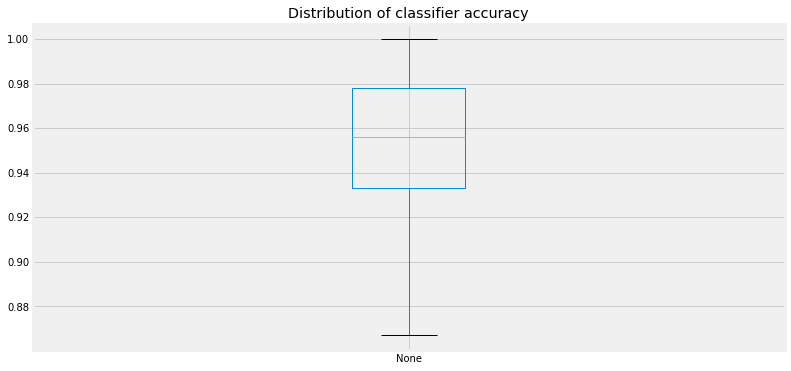

In [59]:
fig, ax = plt.subplots(1, 1, figsize=(12, 6));

accuracy_scores.plot(
    title='Distribution of classifier accuracy',
    kind='box',
    ax=ax
)

fig.show()

print(
    'Average Score: {:.3} [5th percentile: {:.3} & 95th percentile: {:.3}]'.format(
        accuracy_scores.mean(),
        accuracy_scores.quantile(.05),
        accuracy_scores.quantile(.95),
    )
)

In [60]:
import pandas as pd

from sklearn.model_selection import ShuffleSplit
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate

clf = DecisionTreeClassifier()
rs = ShuffleSplit(n_splits=100, test_size=0.3)

x = df[iris.feature_names]
y = df['target']

cv_results = cross_validate(
    clf, x, y, cv=rs, scoring='accuracy'
)

accuracy_scores = pd.Series(cv_results['test_score'])

In [61]:
accuracy_scores.mean() # 0.9402222222222224

0.9468888888888888

/Users/tarek/anaconda3/envs/scikitbook/lib/python3.6/site-packages/ipykernel_launcher.py:9: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  if __name__ == '__main__':


Average Score: 0.947 [5th percentile: 0.889 & 95th percentile: 0.979]


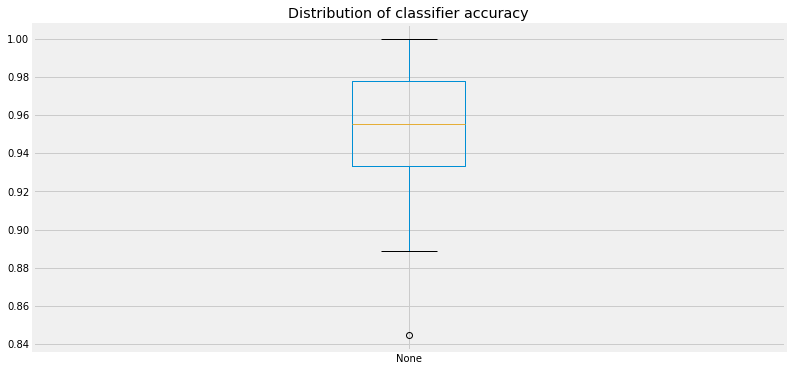

In [62]:
fig, ax = plt.subplots(1, 1, figsize=(12, 6));

accuracy_scores.plot(
    title='Distribution of classifier accuracy',
    kind='box',
    ax=ax
)

fig.show()

print(
    'Average Score: {:.3} [5th percentile: {:.3} & 95th percentile: {:.3}]'.format(
        accuracy_scores.mean(),
        accuracy_scores.quantile(.05),
        accuracy_scores.quantile(.95),
    )
)

## Hyper parameters selections

In [63]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.model_selection import ShuffleSplit
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate

df_train, df_test = train_test_split(df, test_size=0.25)

x_train = df_train[iris.feature_names]
x_test  = df_test[iris.feature_names]

y_train = df_train['target']
y_test  = df_test['target']


for max_depth in [1, 2, 3, 4]:

    clf = DecisionTreeClassifier(max_depth=max_depth)
    rs = ShuffleSplit(n_splits=20, test_size=0.25)

    cv_results = cross_validate(
        clf, x_train, y_train, cv=rs, scoring='accuracy'
    )

    accuracy_scores = pd.Series(cv_results['test_score'])    
    print(
        '@ max_depth = {}: accuracy_scores: {}~{}'.format(
            max_depth, 
            accuracy_scores.quantile(.1).round(3), 
            accuracy_scores.quantile(.9).round(3)
        )
    )
    
    

@ max_depth = 1: accuracy_scores: 0.571~0.75
@ max_depth = 2: accuracy_scores: 0.929~0.968
@ max_depth = 3: accuracy_scores: 0.893~1.0
@ max_depth = 4: accuracy_scores: 0.925~0.968


In [64]:
for max_depth in [1, 2, 3, 4]:
    clf = DecisionTreeClassifier(max_depth=max_depth)
    clf.fit(x_train, y_train)
    y_test_pred = clf.predict(x_test)
    print(
        '@ max_depth = {}: test accuracy: {}'.format(
            max_depth, round(accuracy_score(y_test, y_test_pred), 3)
        )
    )

@ max_depth = 1: test accuracy: 0.605
@ max_depth = 2: test accuracy: 0.947
@ max_depth = 3: test accuracy: 0.947
@ max_depth = 4: test accuracy: 0.947


## K-Fold Cross Validation

- Calculating any metric varies a lot, especially with small data
- To set model hyper prameters, we need to even split training further into training and devlopment set
- Here comes cross validation for the training set
- Once we know best hyper parameters, we apply them on the test set 

Cross Validation:
https://scikit-learn.org/stable/modules/cross_validation.html

Cross Validation + Parameters Search:
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

In [65]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold

def cross_validate(x_train, y_train, max_depth):

    # Do not worry if this code is not very clear, it can replaced by cross_val_score
    # https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html
    
    accuracy_scores = []
    
    kf = KFold(n_splits=5)
    
    for train_index, test_index in kf.split(x_train):
        
        x_train_train, x_train_eval = x_train.iloc[train_index], x_train.iloc[test_index]
        y_train_train, y_train_eval = y_train.iloc[train_index], y_train.iloc[test_index]
        
        clf = DecisionTreeClassifier(max_depth=max_depth)
        clf.fit(x_train_train, y_train_train)
        y_train_eval_pred = clf.predict(x_train_eval)
        
        accuracy_scores.append(
            accuracy_score(y_train_eval, y_train_eval_pred)
        )
        
    accuracy_scores = pd.Series(accuracy_scores)
    
    # I am using Z distributiion here for simplicity.
    # In practice, you may need to use T distributiion instead.
    confidence_interval_min = accuracy_scores.mean() - 1.645 * accuracy_scores.sem()
    confidence_interval_max = accuracy_scores.mean() + 1.645 * accuracy_scores.sem()
    return (confidence_interval_min, confidence_interval_max)
    
        
def compare_multiple_max_depths(x_train, y_train, max_depths):
    
    # This and the above combined = GridSearchCV
    
    for max_depth in max_depths:
        
        confidence_interval_min, confidence_interval_max = cross_validate(x_train, y_train, max_depth)
        
        print(f'Accuracy @ max_depth={max_depth}: {confidence_interval_min:.2%} ~ {confidence_interval_max:.2%}')
        
        
cross_validate(x_train, y_train, max_depth=4)
compare_multiple_max_depths(x_train, y_train, max_depths=[2, 3, 4, 9, 15, ])

Accuracy @ max_depth=2: 93.31% ~ 97.84%
Accuracy @ max_depth=3: 95.57% ~ 99.13%
Accuracy @ max_depth=4: 93.31% ~ 97.84%
Accuracy @ max_depth=9: 93.31% ~ 97.84%
Accuracy @ max_depth=15: 94.53% ~ 100.25%


In [66]:
clf = DecisionTreeClassifier(max_depth=2)

clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

print(f'Accuracy: {accuracy_score(y_test, y_pred):.2%}')

Accuracy: 94.74%


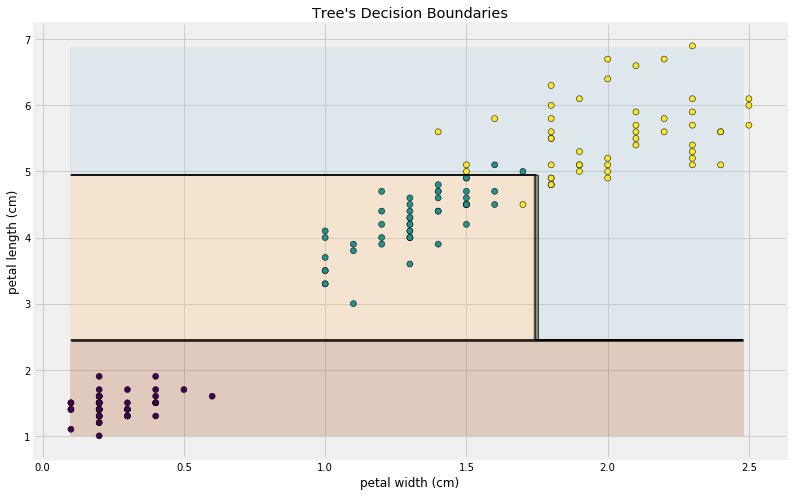

In [67]:
# Inspired by the code from Richard Johansson @ Chalmers University of Technology

def plot_decision_boundary(clf, x, y):
    
    feature_names = x.columns
    x, y = x.values, y.values
    
    x_min, x_max = x[:,0].min(), x[:,0].max()
    y_min, y_max = x[:,1].min(), x[:,1].max()
    
    step = 0.02
    
    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, step),
        np.arange(y_min, y_max, step)
    )
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(12,8))
    plt.contourf(xx, yy, Z, cmap='Paired_r', alpha=0.25)
    plt.contour(xx, yy, Z, colors='k', linewidths=0.7)
    # plt.scatter(x[:,0], x[:,1], c=y, cmap='Paired_r', edgecolors='k')
    plt.scatter(x[:,0], x[:,1], c=y, edgecolors='k')
    plt.title("Tree's Decision Boundaries")
    plt.xlabel(feature_names[0])
    plt.ylabel(feature_names[1])
    
    
x = df[['petal width (cm)', 'petal length (cm)']]
y = df['target']

clf = DecisionTreeClassifier(max_depth=3)
clf.fit(x, y)

plot_decision_boundary(clf, x, y)